#IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

LOAD DATASET

In [9]:
df

,md5,sha1,file_extension,EntryPoint,PEType,MachineType,magic_number,bytes_on_last_page,pages_in_file,relocations,...,total_procsses,files_malicious,files_suspicious,files_text,files_unknown,dlls_calls,apis,Class,Category,Family
0,d5aa2b2506dd71b65307bb551a6a099d,62f4d55a1bb8396e493d7815dc44febed7161535,exe,0x108ec,PE32+,AMD AMD64,MZ,0x0090,0x0003,0x0000,...,0.0,0.0,0.0,0.0,0.0,6.0,162.0,Benign,Benign,Benign
1,8d1178cec97f96a9ede3efe2f30ef30e,ca40945a4e35d48794a5e13aacf16b8ae1caddeb,exe,0x25cf9c,PE32+,AMD AMD64,MZ,0x0090,0x0003,0x0000,...,93.0,0.0,0.0,0.0,0.0,22.0,778.0,Benign,Benign,Benign
2,c08d7afb7966f452cf5aa9283fe8880a,6f47b50480bea61ae4dfb75c12582990cc5ce770,exe,0x2a7e,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,35.0,0.0,0.0,0.0,0.0,1.0,1.0,Benign,Benign,Benign
3,3554a3a99e7ffb57552aedcb2520f1d2,8c3d5b506a8d55f42f4c83ead3e4341255d1acfc,exe,0x64ca0,PE32+,AMD AMD64,MZ,0x0090,0x0003,0x0004,...,0.0,0.0,0.0,0.0,0.0,1.0,40.0,Benign,Benign,Benign
4,5be9511d42136df49d9501680e84109f,0a7d0c68c591db2f197b2169d226bebe6e9bdabe,exe,0x1b9ae,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,36.0,0.0,0.0,0.0,0.0,1.0,1.0,Benign,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747,3aabbbed7dd5e3589f2387ec1a62471f,067d84bef48f6abc37226c6ccb981d21f7c8b93f,exe,0x889b6,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,29.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware,Stealer,Snake
21748,c62343c3c6463795e88fe0a2a81c82b3,02df1939b04bc7de83c3029c5eb8e9b25cc9be91,exe,0x9a2f2,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,32.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware,Stealer,Snake
21749,db92e74aee2f64a0b40a64c1a014e257,fde61811f7ae53f9fa59e17fb5c2c6143a48b282,exe,0x9a2f2,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,35.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware,Stealer,Snake
21750,06e50d688d5b79ffea6135c7a55402cd,ad58274e8425775b284ee1f314f879100d437340,exe,0x9a2f2,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,29.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware,Stealer,Snake


In [8]:
# Ganti path ini sesuai lokasi file kamu
file_path = "Final_Dataset_without_duplicate.csv"
df = pd.read_csv(file_path, low_memory=False)


# Lihat ukuran dan struktur awal
print("\n=== INFORMASI DATASET ===")
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

print("\nKolom yang tersedia:")
print(df.columns.tolist())  # tampilkan kolom pertama

print("\n5 baris pertama:")
print(df.head())


=== INFORMASI DATASET ===
Jumlah baris: 21752
Jumlah kolom: 77

Kolom yang tersedia:
['md5', 'sha1', 'file_extension', 'EntryPoint', 'PEType', 'MachineType', 'magic_number', 'bytes_on_last_page', 'pages_in_file', 'relocations', 'size_of_header', 'min_extra_paragraphs', 'max_extra_paragraphs', 'init_ss_value', 'init_sp_value', 'init_ip_value', 'init_cs_value', 'over_lay_number', 'oem_identifier', 'address_of_ne_header', 'Magic', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'OperatingSystemVersion', 'ImageVersion', 'SizeOfImage', 'SizeOfHeaders', 'Checksum', 'Subsystem', 'DllCharacteristics', 'SizeofStackReserve', 'SizeofStackCommit', 'SizeofHeapCommit', 'SizeofHeapReserve', 'LoaderFlags', 'text_VirtualSize', 'text_VirtualAddress', 'text_SizeOfRawData', 'text_PointerToRawData', 'text_PointerToRelocations', 'text_PointerToLineNumbers', 'text_Characteristics', 'rdata_V

In [ ]:
# ============================================
# STEP 3: Basic Data Info
# ============================================

print("\n=== INFORMASI UMUM ===")
df.info()

print("\n=== STATISTIK DESKRIPTIF (NUMERIC) ===")
print(df.describe())

print("\n=== NILAI KOSONG (Missing Values) ===")
print(df.isnull().sum().sort_values(ascending=False).head(10))

print("\n=== LABEL DISTRIBUTION ===")
# Asumsikan ada kolom 'label' atau 'class' atau 'malicious'
label_cols = [col for col in df.columns if col.lower() in ['label', 'class', 'target', 'malicious']]
if label_cols:
    label_col = label_cols[0]
    print(f"Kolom label terdeteksi: {label_col}")
    print(df[label_col].value_counts())
else:
    print("⚠️ Kolom label belum ditemukan secara otomatis — nanti kita tentukan manual.")


=== INFORMASI UMUM ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21752 entries, 0 to 21751
Data columns (total 77 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   md5                         21752 non-null  object 
 1   sha1                        21752 non-null  object 
 2   file_extension              21752 non-null  object 
 3   EntryPoint                  21752 non-null  object 
 4   PEType                      21752 non-null  object 
 5   MachineType                 21752 non-null  object 
 6   magic_number                21752 non-null  object 
 7   bytes_on_last_page          21752 non-null  object 
 8   pages_in_file               21752 non-null  object 
 9   relocations                 21752 non-null  object 
 10  size_of_header              21752 non-null  object 
 11  min_extra_paragraphs        21752 non-null  object 
 12  max_extra_paragraphs        21752 non-null  object 
 13  init_ss

DATA PREPROCESSING

In [5]:
# 1️⃣ Hapus kolom yang tidak relevan (ID unik)
drop_cols = ['md5', 'sha1']
df = df.drop(columns=drop_cols, errors='ignore')

# 2️⃣ Encode label 'Class' menjadi numerik
df['Class'] = df['Class'].map({'Benign': 0, 'Malware': 1})

# 3️⃣ Pisahkan fitur dan label
X = df.drop(columns=['Class'])
y = df['Class']

# 4️⃣ Identifikasi tipe kolom
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Jumlah fitur numerik: {len(num_cols)}")
print(f"Jumlah fitur kategorikal: {len(cat_cols)}")

# 5️⃣ Buat transformer untuk preprocessing
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', LabelEncoder())  # Nanti kita encode manual per kolom
])

# Karena LabelEncoder tidak bisa langsung di ColumnTransformer untuk banyak kolom,
# kita lakukan encoding manual untuk kolom kategorikal

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

print("✅ Semua kolom kategorikal berhasil di-encode.")

# 6️⃣ Standarisasi fitur numerik
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

print("✅ Fitur numerik berhasil di-scale.")

# 7️⃣ Split data menjadi train & test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nUkuran data train: {X_train.shape}")
print(f"Ukuran data test : {X_test.shape}")

print("\n✅ Data preprocessing selesai dan siap untuk modeling.")


Jumlah fitur numerik: 18
Jumlah fitur kategorikal: 56
✅ Semua kolom kategorikal berhasil di-encode.
✅ Fitur numerik berhasil di-scale.

Ukuran data train: (17401, 74)
Ukuran data test : (4351, 74)

✅ Data preprocessing selesai dan siap untuk modeling.


EXPLORATORY DATA ANALYSIS

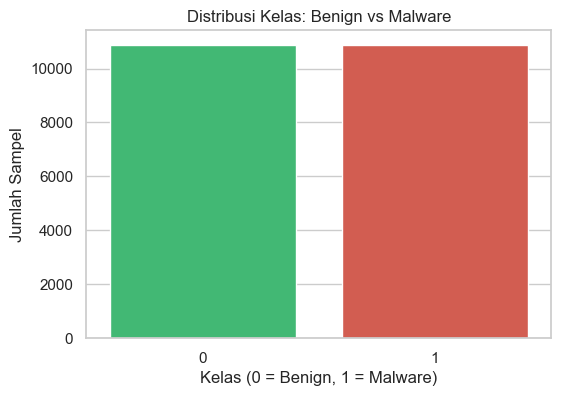


Distribusi Label:
Class
0    10876
1    10876
Name: count, dtype: int64


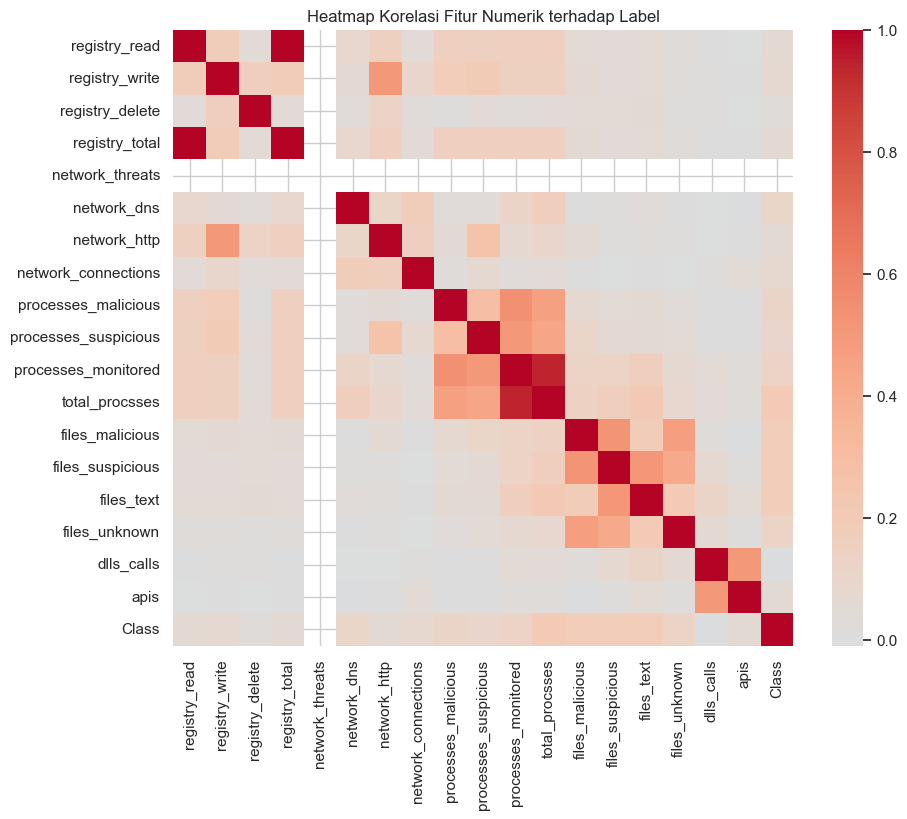


Top 10 fitur yang paling berkorelasi dengan label (positif/negatif):
Class                   1.000000
total_procsses          0.206377
files_text              0.185967
files_malicious         0.181668
files_suspicious        0.179985
processes_monitored     0.133086
files_unknown           0.127705
processes_malicious     0.113999
network_dns             0.110005
processes_suspicious    0.100080
Name: Class, dtype: float64
processes_suspicious    0.100080
network_connections     0.077697
registry_write          0.069566
registry_total          0.062291
registry_read           0.060245
network_http            0.055021
apis                    0.051610
registry_delete         0.020985
dlls_calls             -0.009951
network_threats              NaN
Name: Class, dtype: float64


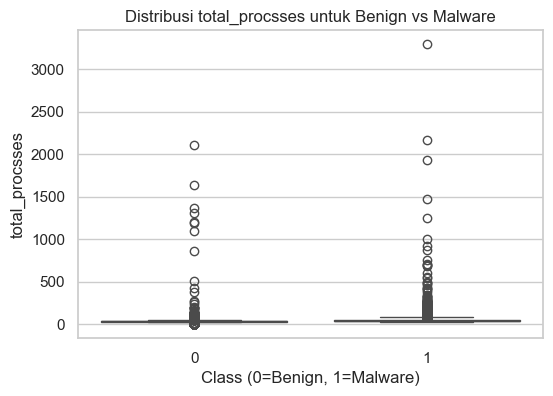

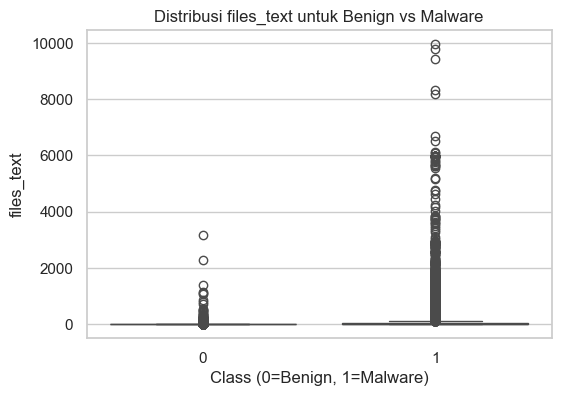

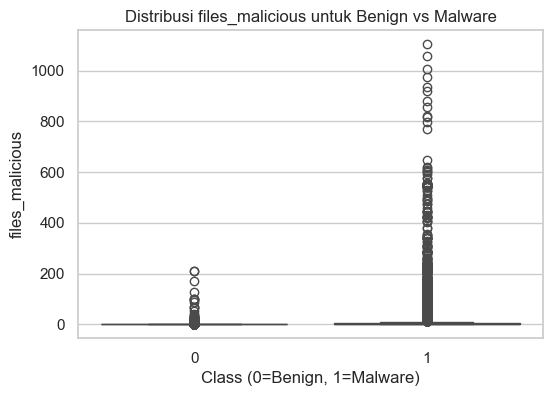

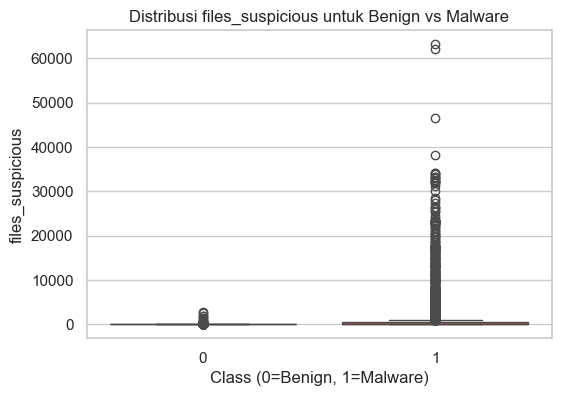

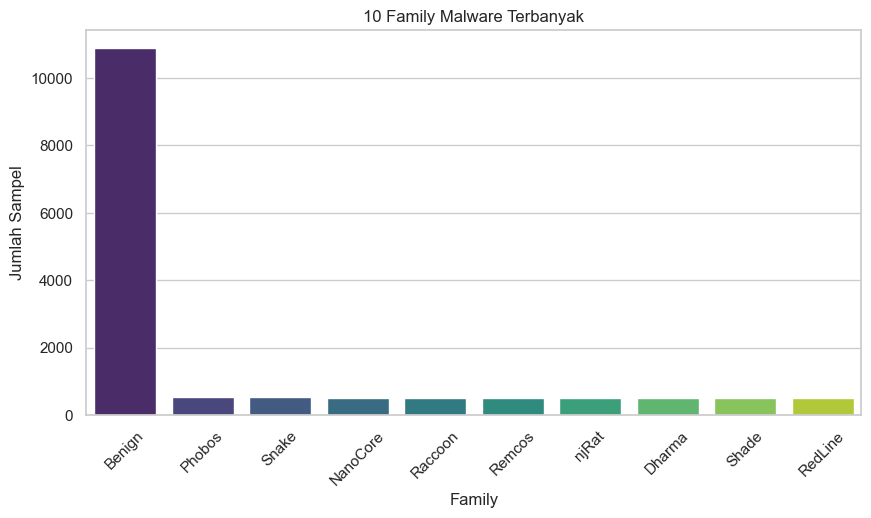


Top 10 malware families:
Family
Benign      10876
Phobos        550
Snake         527
NanoCore      520
Raccoon       518
Remcos        512
njRat         506
Dharma        505
Shade         504
RedLine       500
Name: count, dtype: int64


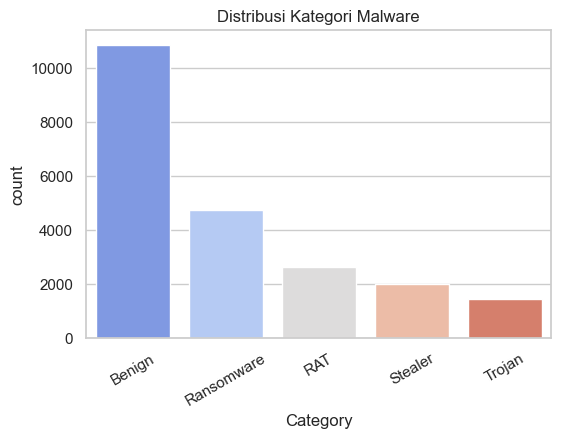

In [6]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# 1️⃣ Distribusi Label (Benign vs Malware)
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette=['#2ecc71', '#e74c3c'])
plt.title("Distribusi Kelas: Benign vs Malware")
plt.xlabel("Kelas (0 = Benign, 1 = Malware)")
plt.ylabel("Jumlah Sampel")
plt.show()

print("\nDistribusi Label:")
print(y.value_counts())

# 2️⃣ Analisis Feature Numerik — Korelasi antar fitur
corr = df[num_cols + ['Class']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Heatmap Korelasi Fitur Numerik terhadap Label")
plt.show()

# tampilkan fitur yang paling berkorelasi dengan label
corr_with_label = corr['Class'].sort_values(ascending=False)
print("\nTop 10 fitur yang paling berkorelasi dengan label (positif/negatif):")
print(corr_with_label.head(10))
print(corr_with_label.tail(10))

# 3️⃣ Visualisasi fitur penting secara univariat
top_corr_features = corr_with_label.abs().sort_values(ascending=False).head(5).index.tolist()
top_corr_features.remove('Class')

for feature in top_corr_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=y, y=df[feature], palette=['#2ecc71', '#e74c3c'])
    plt.title(f"Distribusi {feature} untuk Benign vs Malware")
    plt.xlabel("Class (0=Benign, 1=Malware)")
    plt.ylabel(feature)
    plt.show()

# 4️⃣ Analisis kategori Family dan Category
if 'Family' in df.columns:
    top_families = df['Family'].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_families.index, y=top_families.values, palette='viridis')
    plt.title("10 Family Malware Terbanyak")
    plt.xticks(rotation=45)
    plt.ylabel("Jumlah Sampel")
    plt.show()
    print("\nTop 10 malware families:")
    print(top_families)

if 'Category' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='coolwarm')
    plt.title("Distribusi Kategori Malware")
    plt.xticks(rotation=30)
    plt.show()
